In [30]:
import sys
import matplotlib.pyplot as plt

sys.path.insert(0, '../codes/')
from bulkmotion_utils import *

font_size=12
plt.rcParams.update({'font.size': font_size})

In [31]:
datahome = '/net/kraken/nobak/ykliu/2022-BulkMotion/data'
picdir   = '/net/kraken/nobak/ykliu/2022-BulkMotion/pdf'
my_json  = '/net/kraken/nobak/ykliu/2022-BulkMotion/inputs/brief.json'

# Makran: A series of corrections

In [32]:
vDict = {
            "geo"         : f"{datahome}/Makran_a086_Geo.h5",
            "dem"         : f"{datahome}/Makran_a086.dem",
            "velo_raw"    : f"{datahome}/Makran_a086_velR.h5",
            "velo_ion"    : f"{datahome}/Makran_a086_velR_ion.h5",
            "velo_ERA5"   : f"{datahome}/Makran_a086_velR_ion_ERA5.h5",
            "velo_SET"    : f"{datahome}/Makran_a086_velR_ion_ERA5_SET.h5",
            "velo_demErr" : f"{datahome}/Makran_a086_velR_ion_ERA5_SET_demErr.h5",
            "velo_bmModel": f"{datahome}/Makran_a086_vel_bmModel.h5",
            "velo_bmCorr" : f"{datahome}/Makran_a086_vel_bmCorr.h5"
            }

v, demfile, atr = prepare_data_order(vDict)

In [33]:
## Set common plotting specs

w_cm  = 19       # max width of GRL figure
l_cm  = 11.5     # not used
cm2in = 1/2.54   # mm to inches

kwargs = dict()
kwargs['subplot_w']     = w_cm*cm2in
kwargs['font_size']     = 8
kwargs['laloStep']      = 2
kwargs['wspace']        = 0.
kwargs['title_pad']     = 4
kwargs['suptity']       = 0.1
kwargs['alpha']         = 0.85
kwargs['cbox_alpha']    = 0.85
kwargs['abox_alpha']    = 0.85
kwargs['shadeExg']      = 0.05
kwargs['shadeMin']      = -5e3
kwargs['shadeMax']      =  5e3
kwargs['refpoint']      = False
kwargs['dpi']           = 800
kwargs['cmap']          = 'RdYlBu_r'
kwargs['corient']       = 'horizontal'
cbar_h = 0.12
kwargs['cbox_loc']      = (0., 0.-0.01-cbar_h, 1, cbar_h)
kwargs['cbox_hide']     = True
kwargs['cbox_wh']       = ['90%','50%']
kwargs['clabel_pad']    = 2
kwargs['sbox_loc']      = (0, 0, .4, .09)
kwargs['scalebar_loc']  = [0.3, kwargs['sbox_loc'][0]+0.2, kwargs['sbox_loc'][1]+.015]
kwargs['scalebar_pad']  = 0.04
kwargs['tbox_loc']      = (0, kwargs['sbox_loc'][3], .18, .16)
kwargs['annot_boxsize'] = 0.1
kwargs['yticks']        = [26., 28., 30.]
kwargs['xticks']        = [60., 62.]
kwargs['ub']            = 97.5
kwargs['lb']            = 2.5
#kwargs['ticks_fontsize'] = 8

ext = 'pdf'

Plot data no. 1: <Uncorrected velocity>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086_velR.h5 velocity --fontsize 8 -u mm -v -20 20 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference
Plot data no. 2: <Ionosphere removed>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086_velR.h5 velocity --fontsize 8 -u mm -v -5 5 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference
Plot data no. 3: <Tropo model removed>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a

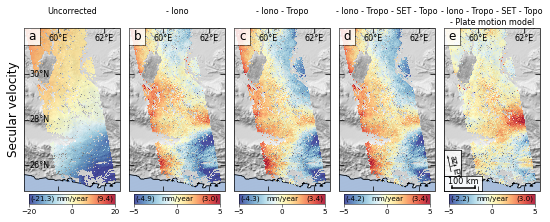

Plot data no. 1: <Ionosphere>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086_velR.h5 velocity --fontsize 8 -u mm -v -20 20 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference
Plot data no. 2: <Troposphere>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086_velR.h5 velocity --fontsize 8 -u mm -v -3 3 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference
Plot data no. 3: <SET>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_a086_velR.h5 velocity --fontsize 8

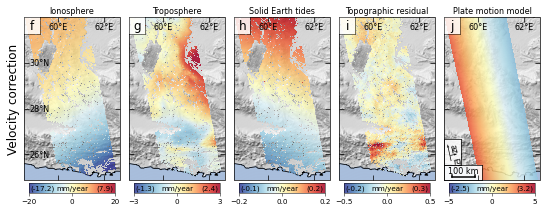

In [34]:
## Plot
dName = 'Makran a086'
name, track = dName.split(' ')

kwargs['vlims']      = [[-20 ,20], [-5,5], [-5,5], [-5,5], [-5,5]]
kwargs['annotation'] = ['a', 'b', 'c', 'd', 'e']

show_list = ['Uncorrected velocity', 'Ionosphere removed', 'Tropo model removed', 'SET & DEM error removed', 'Plate motion removed']
titles    = ['Uncorrected\n', '- Iono\n', '- Iono - Tropo\n', '- Iono - Tropo - SET - Topo\n', '- Iono - Tropo - SET - Topo\n- Plate motion model']
v_show    = {ikey: v[ikey] for ikey in show_list}
fname     = '{}/{}_{}_CorrSeries_0.{}'.format(picdir, name, track, ext)
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, row_title='Secular velocity', outfile=fname, **kwargs)



## Change the input data and color range to plot the correction
kwargs['vlims']      = [[-20 ,20], [-3,3], [-.2,.2], [-.5,.5], [-5,5]]
kwargs['annotation'] = ['f', 'g', 'h', 'i', 'j']

show_list = ['Ionosphere', 'Troposphere', 'SET', 'DEM error', 'Plate motion']
titles    = ['Ionosphere', 'Troposphere', 'Solid Earth tides', 'Topographic residual', 'Plate motion model']
v_show    = {ikey: v[ikey] for ikey in show_list}
fname     = '{}/{}_{}_CorrSeries_1.{}'.format(picdir, name, track, ext)
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, row_title='Velocity correction', outfile=fname, **kwargs)

In [35]:
vDict = {
            "geo"         : f"{datahome}/Makran_d020_Geo.h5",
            "dem"         : f"{datahome}/Makran_d020.dem",
            "velo_raw"    : f"{datahome}/Makran_d020_velR.h5",
            "velo_ion"    : f"{datahome}/Makran_d020_velR_ion.h5",
            "velo_ERA5"   : f"{datahome}/Makran_d020_velR_ion_ERA5.h5",
            "velo_SET"    : f"{datahome}/Makran_d020_velR_ion_ERA5_SET.h5",
            "velo_demErr" : f"{datahome}/Makran_d020_velR_ion_ERA5_SET_demErr.h5",
            "velo_bmModel": f"{datahome}/Makran_d020_vel_bmModel.h5",
            "velo_bmCorr" : f"{datahome}/Makran_d020_vel_bmCorr.h5"
            }

v, demfile, atr = prepare_data_order(vDict)

Plot data no. 1: <Uncorrected velocity>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020_velR.h5 velocity --fontsize 8 -u mm -v -6 6 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference
Plot data no. 2: <Ionosphere removed>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020_velR.h5 velocity --fontsize 8 -u mm -v -6 6 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference
Plot data no. 3: <Tropo model removed>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d02

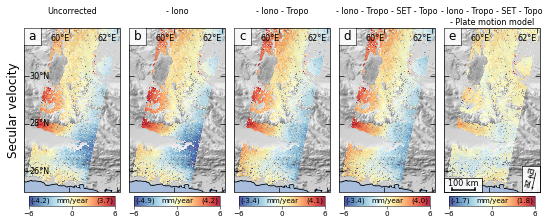

Plot data no. 1: <Ionosphere>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020_velR.h5 velocity --fontsize 8 -u mm -v -2 2 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference
Plot data no. 2: <Troposphere>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020_velR.h5 velocity --fontsize 8 -u mm -v -2 2 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.8 --noreference
Plot data no. 3: <SET>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Makran_d020_velR.h5 velocity --fontsize 8 -

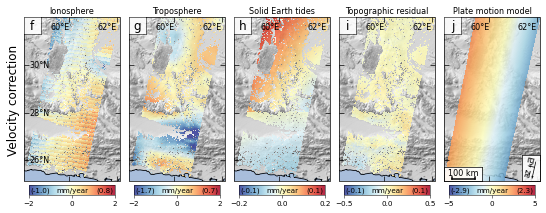

In [36]:
## Plot
dName = 'Makran d020'
name, track = dName.split(' ')

kwargs['sbox_loc']      = (0, 0, .4, .09)
kwargs['scalebar_loc']  = [0.3, kwargs['sbox_loc'][0]+0.2, kwargs['sbox_loc'][1]+.015]
kwargs['scalebar_pad']  = 0.04
kwargs['tbox_loc']      = (1-.19, 0, .19, .16)

kwargs['tick_params']= ['in', -14, -25, True, False, False, True, 'right', 'center']
kwargs['vlims']      = [-6,6]
kwargs['annotation'] = ['a', 'b', 'c', 'd', 'e']

show_list = ['Uncorrected velocity', 'Ionosphere removed', 'Tropo model removed', 'SET & DEM error removed', 'Plate motion removed']
titles    = ['Uncorrected\n', '- Iono\n', '- Iono - Tropo\n', '- Iono - Tropo - SET - Topo\n', '- Iono - Tropo - SET - Topo\n- Plate motion model']
v_show    = {ikey: v[ikey] for ikey in show_list}
fname     = '{}/{}_{}_CorrSeries_0.{}'.format(picdir, name, track, ext)
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, row_title='Secular velocity', outfile=fname, **kwargs)


## Change the input data and color range to plot the correction
kwargs['vlims']      = [[-2,2], [-2,2], [-.2,.2], [-.5,.5], [-5,5]]
kwargs['annotation'] = ['f', 'g', 'h', 'i', 'j']

show_list = ['Ionosphere', 'Troposphere', 'SET', 'DEM error', 'Plate motion']
titles    = ['Ionosphere', 'Troposphere', 'Solid Earth tides', 'Topographic residual', 'Plate motion model']
v_show    = {ikey: v[ikey] for ikey in show_list}
fname     = '{}/{}_{}_CorrSeries_1.{}'.format(picdir, name, track, ext)
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, row_title='Velocity correction', outfile=fname, **kwargs)

# Aqaba: ramp before and after plate motion correciton

In [37]:
dName = 'Aqaba a087'
name, track = dName.split(' ')
vDict = {
            "geo"         : f"{datahome}/{name}_{track}_Geo.h5",
            "dem"         : f"{datahome}/{name}_{track}.dem",
            "velo_raw"    : f"{datahome}/{name}_{track}_velR.h5",
            "velo_ion"    : f"{datahome}/{name}_{track}_velR_ion.h5",
            "velo_ERA5"   : f"{datahome}/{name}_{track}_velR_ion_ERA5.h5",
            "velo_SET"    : f"{datahome}/{name}_{track}_velR_ion_ERA5_SET.h5",
            "velo_demErr" : f"{datahome}/{name}_{track}_velR_ion_ERA5_SET_demErr.h5",
            "velo_bmModel": f"{datahome}/{name}_{track}_velR_ion_ERA5_SET_demErr_bmModel.h5",
            "velo_bmCorr" : f"{datahome}/{name}_{track}_velR_ion_ERA5_SET_demErr_bmCorr.h5"
            }

v, demfile, atr = prepare_data_order(vDict)

Plot data no. 1: <Uncorrected velocity>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087_velR.h5 velocity --fontsize 8 -u mm -v -10 10 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.5 --noreference
Plot data no. 2: <Ionosphere removed>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087_velR.h5 velocity --fontsize 8 -u mm -v -10 10 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.5 --noreference
Plot data no. 3: <Tropo model removed>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087

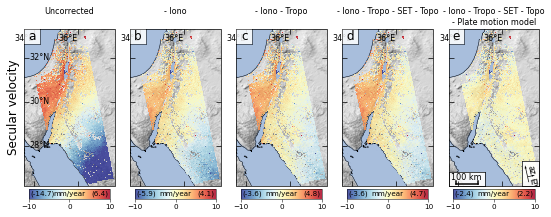

Plot data no. 1: <Ionosphere>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087_velR.h5 velocity --fontsize 8 -u mm -v -10 10 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.5 --noreference
Plot data no. 2: <Troposphere>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087_velR.h5 velocity --fontsize 8 -u mm -v -2 2 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.5 --noreference
Plot data no. 3: <SET>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_a087_velR.h5 velocity --fontsize 8 -u m

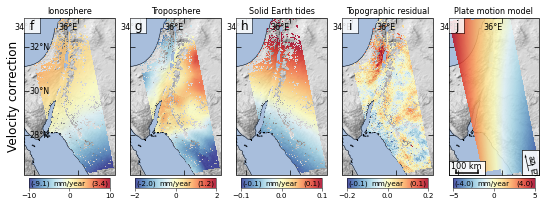

In [38]:
## Plot

kwargs['vlims']      = [[-10 ,10], [-10,10], [-10,10], [-10,10], [-10,10]]
kwargs['annotation'] = ['a', 'b', 'c', 'd', 'e']
kwargs['yticks']     = [28., 30., 32.]
kwargs['xticks']     = [34., 36.]
kwargs['coast_lw']   = 0.5

show_list = ['Uncorrected velocity', 'Ionosphere removed', 'Tropo model removed', 'SET & DEM error removed', 'Plate motion removed']
titles    = ['Uncorrected\n', '- Iono\n', '- Iono - Tropo\n', '- Iono - Tropo - SET - Topo\n', '- Iono - Tropo - SET - Topo\n- Plate motion model']
v_show    = {ikey: v[ikey] for ikey in show_list}
fname     = '{}/{}_{}_CorrSeries_0.{}'.format(picdir, name, track, ext)
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, row_title='Secular velocity', outfile=fname, **kwargs)



## Change the input data and color range to plot the correction
kwargs['vlims']      = [[-10,10], [-2,2], [-.1,.1], [-.2,.2], [-5,5]]
kwargs['annotation'] = ['f', 'g', 'h', 'i', 'j']

show_list = ['Ionosphere', 'Troposphere', 'SET', 'DEM error', 'Plate motion']
titles    = ['Ionosphere', 'Troposphere', 'Solid Earth tides', 'Topographic residual', 'Plate motion model']
v_show    = {ikey: v[ikey] for ikey in show_list}
fname     = '{}/{}_{}_CorrSeries_1.{}'.format(picdir, name, track, ext)
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, row_title='Velocity correction', outfile=fname, **kwargs)

In [39]:
dName = 'Aqaba d021'
name, track = dName.split(' ')
vDict = {
            "geo"         : f"{datahome}/{name}_{track}_Geo.h5",
            "dem"         : f"{datahome}/{name}_{track}.dem",
            "velo_raw"    : f"{datahome}/{name}_{track}_velR.h5",
            "velo_ion"    : f"{datahome}/{name}_{track}_velR_ion.h5",
            "velo_ERA5"   : f"{datahome}/{name}_{track}_velR_ion_ERA5.h5",
            "velo_SET"    : f"{datahome}/{name}_{track}_velR_ion_ERA5_SET.h5",
            "velo_demErr" : f"{datahome}/{name}_{track}_velR_ion_ERA5_SET_demErr.h5",
            "velo_bmModel": f"{datahome}/{name}_{track}_velR_ion_ERA5_SET_demErr_bmModel.h5",
            "velo_bmCorr" : f"{datahome}/{name}_{track}_velR_ion_ERA5_SET_demErr_bmCorr.h5"
            }

v, demfile, atr = prepare_data_order(vDict)

Plot data no. 1: <Uncorrected velocity>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021_velR.h5 velocity --fontsize 8 -u mm -v -6 6 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.5 --noreference
Plot data no. 2: <Ionosphere removed>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021_velR.h5 velocity --fontsize 8 -u mm -v -6 6 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.5 --noreference
Plot data no. 3: <Tropo model removed>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021_vel

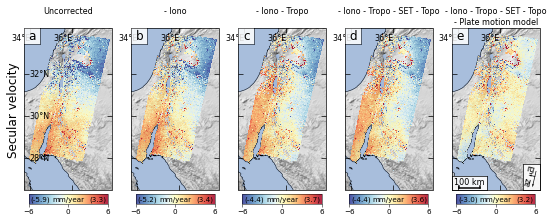

Plot data no. 1: <Ionosphere>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021_velR.h5 velocity --fontsize 8 -u mm -v -4 4 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.5 --noreference
Plot data no. 2: <Troposphere>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021_velR.h5 velocity --fontsize 8 -u mm -v -2 2 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.5 --noreference
Plot data no. 3: <SET>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Aqaba_d021_velR.h5 velocity --fontsize 8 -u mm 

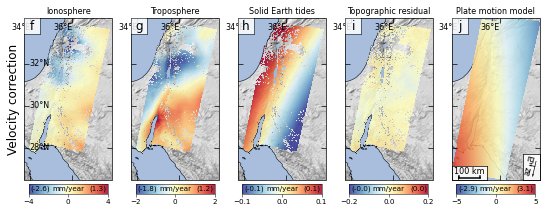

In [40]:
## Plot

kwargs['sbox_loc']      = (0, 0, .4, .09)
kwargs['scalebar_loc']  = [0.3, kwargs['sbox_loc'][0]+0.2, kwargs['sbox_loc'][1]+.015]
kwargs['scalebar_pad']  = 0.04
kwargs['tbox_loc']      = (1-.19, 0, .19, .16)
kwargs['vlims']         = [-6,6]
kwargs['annotation']    = ['a', 'b', 'c', 'd', 'e']
kwargs['coast_lw']      = 0.5

show_list = ['Uncorrected velocity', 'Ionosphere removed', 'Tropo model removed', 'SET & DEM error removed', 'Plate motion removed']
titles    = ['Uncorrected\n', '- Iono\n', '- Iono - Tropo\n', '- Iono - Tropo - SET - Topo\n', '- Iono - Tropo - SET - Topo\n- Plate motion model']
v_show    = {ikey: v[ikey] for ikey in show_list}
fname     = '{}/{}_{}_CorrSeries_0.{}'.format(picdir, name, track, ext)
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, row_title='Secular velocity', outfile=fname, **kwargs)



## Change the input data and color range to plot the correction
kwargs['vlims']      = [[-4,4], [-2,2], [-.1,.1], [-.2,.2], [-5,5]]
kwargs['annotation'] = ['f', 'g', 'h', 'i', 'j']

show_list = ['Ionosphere', 'Troposphere', 'SET', 'DEM error', 'Plate motion']
titles    = ['Ionosphere', 'Troposphere', 'Solid Earth tides', 'Topographic residual', 'Plate motion model']
v_show    = {ikey: v[ikey] for ikey in show_list}
fname     = '{}/{}_{}_CorrSeries_1.{}'.format(picdir, name, track, ext)
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, row_title='Velocity correction', outfile=fname, **kwargs)

# Australia: ramp before and after plate motion correciton


In [41]:
dName = 'Australia d119'
name, track = dName.split(' ')
vDict = {
            "geo"         : f"{datahome}/{name}_{track}_Geo.h5",
            "dem"         : f"{datahome}/{name}_{track}.dem",
            "velo_raw"    : f"{datahome}/{name}_{track}_velR.h5",
            "velo_ion"    : f"{datahome}/{name}_{track}_velR_ion.h5",
            "velo_ERA5"   : f"{datahome}/{name}_{track}_velR_ion_ERA5.h5",
            "velo_SET"    : f"{datahome}/{name}_{track}_velR_ion_ERA5_SET.h5",
            "velo_demErr" : f"{datahome}/{name}_{track}_velR_ion_ERA5_SET_demErr.h5",
            "velo_bmModel": f"{datahome}/{name}_{track}_velR_ion_ERA5_SET_demErr_bmModel.h5",
            "velo_bmCorr" : f"{datahome}/{name}_{track}_velR_ion_ERA5_SET_demErr_bmCorr.h5"
            }

v, demfile, atr = prepare_data_order(vDict)

Plot data no. 1: <Uncorrected velocity>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119_velR.h5 velocity --fontsize 8 -u mm -v -8 8 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.5 --noreference
Plot data no. 2: <Ionosphere removed>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119_velR.h5 velocity --fontsize 8 -u mm -v -8 8 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.5 --noreference
Plot data no. 3: <Tropo model removed>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/dat

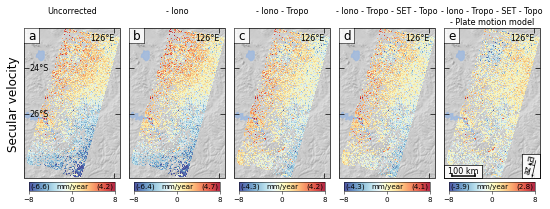

Plot data no. 1: <Ionosphere>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119_velR.h5 velocity --fontsize 8 -u mm -v -1 1 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.5 --noreference
Plot data no. 2: <Troposphere>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119_velR.h5 velocity --fontsize 8 -u mm -v -4 4 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.5 --noreference
Plot data no. 3: <SET>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d119_velR.h5 velocity

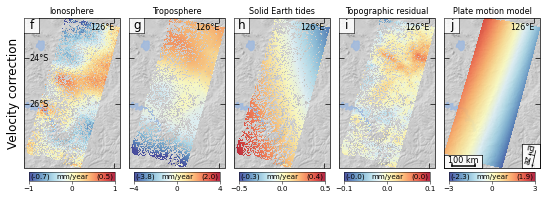

In [42]:
## Plot

kwargs['vlims']      = [[-8,8],[-8,8],[-8,8],[-8,8],[-8,8]]
kwargs['annotation'] = ['a', 'b', 'c', 'd', 'e']
kwargs['yticks']     = [-26., -24.]
kwargs['xticks']     = [126., 128.]
kwargs['coast_lw']   = 0.5

show_list = ['Uncorrected velocity', 'Ionosphere removed', 'Tropo model removed', 'SET & DEM error removed', 'Plate motion removed']
titles    = ['Uncorrected\n', '- Iono\n', '- Iono - Tropo\n', '- Iono - Tropo - SET - Topo\n', '- Iono - Tropo - SET - Topo\n- Plate motion model']
v_show    = {ikey: v[ikey] for ikey in show_list}
fname     = '{}/{}_{}_CorrSeries_0.{}'.format(picdir, name, track, ext)
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, row_title='Secular velocity', outfile=fname, **kwargs)



## Change the input data and color range to plot the correction
kwargs['vlims']      = [[-1,1], [-4,4], [-.5,.5], [-.1,.1], [-3,3]]
kwargs['annotation'] = ['f', 'g', 'h', 'i', 'j']

show_list = ['Ionosphere', 'Troposphere', 'SET', 'DEM error', 'Plate motion']
titles    = ['Ionosphere', 'Troposphere', 'Solid Earth tides', 'Topographic residual', 'Plate motion model']
v_show    = {ikey: v[ikey] for ikey in show_list}
fname     = '{}/{}_{}_CorrSeries_1.{}'.format(picdir, name, track, ext)
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, row_title='Velocity correction', outfile=fname, **kwargs)

In [43]:
dName = 'Australia d046'
name, track = dName.split(' ')
vDict = {
            "geo"         : f"{datahome}/{name}_{track}_Geo.h5",
            "dem"         : f"{datahome}/{name}_{track}.dem",
            "velo_raw"    : f"{datahome}/{name}_{track}_velR.h5",
            "velo_ion"    : f"{datahome}/{name}_{track}_velR_ion.h5",
            "velo_ERA5"   : f"{datahome}/{name}_{track}_velR_ion_ERA5.h5",
            "velo_SET"    : f"{datahome}/{name}_{track}_velR_ion_ERA5_SET.h5",
            "velo_demErr" : f"{datahome}/{name}_{track}_velR_ion_ERA5_SET_demErr.h5",
            "velo_bmModel": f"{datahome}/{name}_{track}_velR_ion_ERA5_SET_demErr_bmModel.h5",
            "velo_bmCorr" : f"{datahome}/{name}_{track}_velR_ion_ERA5_SET_demErr_bmCorr.h5"
            }

v, demfile, atr = prepare_data_order(vDict)

Plot data no. 1: <Uncorrected velocity>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046_velR.h5 velocity --fontsize 8 -u mm -v -6 6 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.5 --noreference
Plot data no. 2: <Ionosphere removed>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046_velR.h5 velocity --fontsize 8 -u mm -v -6 6 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.5 --noreference
Plot data no. 3: <Tropo model removed>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/dat

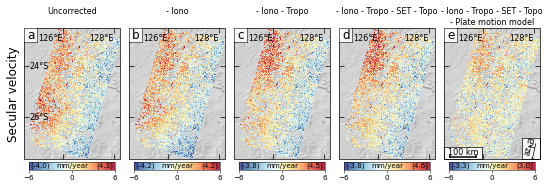

Plot data no. 1: <Ionosphere>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046_velR.h5 velocity --fontsize 8 -u mm -v -1 1 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.5 --noreference
Plot data no. 2: <Troposphere>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046_velR.h5 velocity --fontsize 8 -u mm -v -2 2 --mask no --dem /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046.dem --dem-nocontour -c RdYlBu_r --nocbar --alpha 0.85 --shade-exag 0.05 --shade-min -5000.0 --shade-max 5000.0 --lalo-step 2 --lalo-loc 1 0 0 1 --noscalebar --notitle --noverbose --coastline 10m --coastline-lw 0.5 --noreference
Plot data no. 3: <SET>
view.py /net/kraken/nobak/ykliu/2022-BulkMotion/data/Australia_d046_velR.h5 velocity

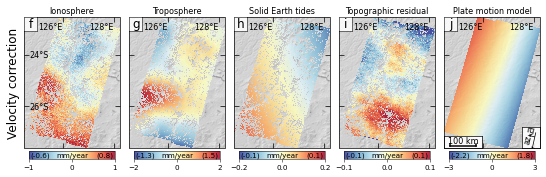

In [44]:
## Plot

kwargs['sbox_loc']      = (0, 0, .4, .09)
kwargs['scalebar_loc']  = [0.3, kwargs['sbox_loc'][0]+0.2, kwargs['sbox_loc'][1]+.015]
kwargs['scalebar_pad']  = 0.04
kwargs['tbox_loc']      = (1-.19, 0, .19, .16)
kwargs['vlims']         = [-6,6]
kwargs['annotation']    = ['a', 'b', 'c', 'd', 'e']
kwargs['coast_lw']      = 0.5

show_list = ['Uncorrected velocity', 'Ionosphere removed', 'Tropo model removed', 'SET & DEM error removed', 'Plate motion removed']
titles    = ['Uncorrected\n', '- Iono\n', '- Iono - Tropo\n', '- Iono - Tropo - SET - Topo\n', '- Iono - Tropo - SET - Topo\n- Plate motion model']
v_show    = {ikey: v[ikey] for ikey in show_list}
fname     = '{}/{}_{}_CorrSeries_0.{}'.format(picdir, name, track, ext)
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, row_title='Secular velocity', outfile=fname, **kwargs)



## Change the input data and color range to plot the correction
kwargs['vlims']      = [[-1,1], [-2,2], [-.2,.2], [-.1,.1], [-3,3]]
kwargs['annotation'] = ['f', 'g', 'h', 'i', 'j']

show_list = ['Ionosphere', 'Troposphere', 'SET', 'DEM error', 'Plate motion']
titles    = ['Ionosphere', 'Troposphere', 'Solid Earth tides', 'Topographic residual', 'Plate motion model']
v_show    = {ikey: v[ikey] for ikey in show_list}
fname     = '{}/{}_{}_CorrSeries_1.{}'.format(picdir, name, track, ext)
plot_imgs(v_show, atr, demfile, titles=titles, super_title=None, row_title='Velocity correction', outfile=fname, **kwargs)